# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_City_file = "Output/cities.xlsx"
output_Wheather_file = "Output/Wheather.xlsx"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries=[]
CityLat=[]
CityLng=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)



In [8]:
loopLen=len(lats)
# Identify nearest city for each lat, lng combination
for i in range(loopLen):
    city = citipy.nearest_city(lats[i], lngs[i]).city_name
    country = citipy.nearest_city(lats[i], lngs[i]).country_code
   
    
        # If the city is unique, then add it to a our cities list
    if city not in cities:
            cities.append(city)
            countries.append(country)
            CityLat.append(lats[i])
            CityLng.append(lngs[i])

# Print the city count to confirm sufficient count
len(cities)

613

In [20]:
rawdata={"city":cities,"Country": countries, "Latitude": CityLat,"Longitude":CityLng}
rawdata
CityDF = pd.DataFrame(rawdata)
CityDF

CityDF.to_excel(output_City_file)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
import requests
# set up additional columns to hold information
      
CityDF['Cloudiness'] = ""    
CityDF['Date'] = ""          
CityDF['Humidity'] = ""      
CityDF['Max Temp'] = ""      
CityDF['Wind Speed'] = "" 

base_url = "http://api.openweathermap.org/data/2.5/weather?"


# use iterrows to iterate through pandas dataframe
for index, row in CityDF.iterrows():

    # iterate thru each row of the file
    SearchCity = row['city']
    # Build query URL

    query_url = base_url + "appid=" + api_key + "&q=" + SearchCity +"&units=imperial"
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    #print (city)
    try:
    # Get temperature from JSON response
        CityDF.loc[index, 'Max Temp'] =weather_json["main"]["temp_max"]
        CityDF.loc[index, 'Humidity'] =weather_json["main"]["humidity"]
        CityDF.loc[index, 'Wind Speed'] =weather_json["wind"]["speed"]
        CityDF.loc[index, 'Cloudiness'] =weather_json["clouds"]["all"]
        CityDF.loc[index, 'Longitude'] =weather_json["coord"]["lon"]
        CityDF.loc[index, 'Latitude'] =weather_json["coord"]["lat"]
        CityDF.loc[index, 'Country'] =weather_json["sys"]["country"]
       
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

 


Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

In [11]:
PlotDF = CityDF.loc[CityDF['Max Temp'] != ""]
PlotDF.columns

Index(['city', 'Country', 'Latitude', 'Longitude', 'Cloudiness', 'Date',
       'Humidity', 'Max Temp', 'Wind Speed'],
      dtype='object')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
PlotDF.to_excel(output_Wheather_file)

In [14]:
PlotDF.head()

,city,Country,Latitude,Longitude,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,busselton,AU,-33.64,115.35,76,,84,54,10.42
2,puerto ayora,EC,-0.74,-90.35,40,,70,84.2,9.17
3,belaya gora,RU,68.54,146.19,80,,84,14.27,3.15
4,bredasdorp,ZA,-34.53,20.04,0,,68,68,13.87
5,flinders,AU,-34.58,150.85,90,,88,68,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

There is a correlation between latitude and temperature. The closer to zero latitude, the higher the temperature. 

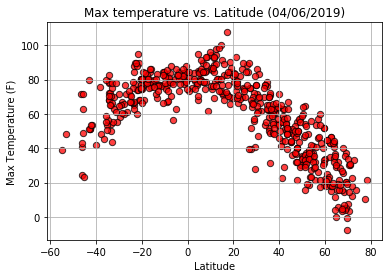

In [23]:
import datetime as dt     
date=dt.datetime.today().strftime("%m/%d/%Y")
#scatterplot
plt.scatter(PlotDF["Latitude"], PlotDF["Max Temp"], marker="o", facecolors="red", edgecolors="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max temperature vs. Latitude (" + str(date) +")")


# Set a grid on the plot
plt.grid()
plt.savefig("Graphs/LatitudeVsTemperaturePlot.png")

#disply plot
plt.show()


#### Latitude vs. Humidity Plot

There is not a correlation between latitude and Humidity

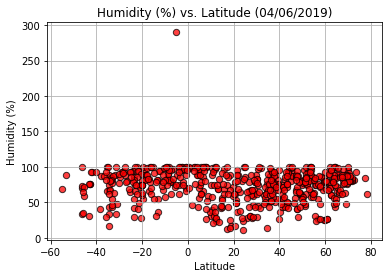

In [24]:
#scatterplot
plt.scatter(PlotDF["Latitude"], PlotDF["Humidity"], marker="o", facecolors="red", edgecolors="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude (" + str(date) +")")


# Set a grid on the plot
plt.grid()
plt.savefig("Graphs/HumidityVsTemperaturePlot.png")

#disply plot
plt.show()

#### Latitude vs. Cloudiness Plot

There is not a correlation between latitude and cloudiness

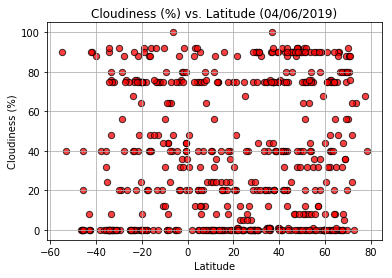

In [25]:
#scatterplot
plt.scatter(PlotDF["Latitude"], PlotDF["Cloudiness"], marker="o", facecolors="red", edgecolors="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude (" + str(date) +")")


# Set a grid on the plot
plt.grid()
plt.savefig("Graphs/CloudinessVsTemperaturePlot.png")

#disply plot
plt.show()

#### Latitude vs. Wind Speed Plot

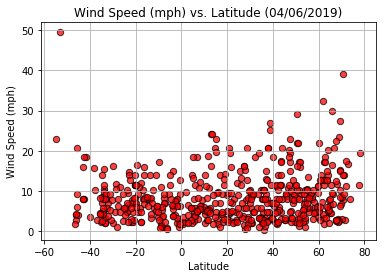

In [26]:
#scatterplot
plt.scatter(PlotDF["Latitude"], PlotDF["Wind Speed"], marker="o", facecolors="red", edgecolors="black", s=40, alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude (" + str(date) +")")


# Set a grid on the plot
plt.grid()
plt.savefig("Graphs/WindVsTemperaturePlot.png")

#disply plot
plt.show()